In [12]:
# import numpy as np
# import matplotlib
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# excel_NL = pd.read_excel(r"C:\toolbox-amiris-emlab\amiris_workflow\amiris-config\data\test.xlsx", index_col=0,
#                          sheet_name=[
#                                      "Load Profile"])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
"""
This script groups the power plants per age. 
The capacity is summed and the efficiency is weighted averaged
Plants smaller than X MW are grouped with the power plants of the nearest age
Sanchez 15-06-22

"""
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    "Biomass_CHP_wood_pellets_PH": "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    'Hydropower_reservoir_medium': "darkcyan",
    'PV_utility_systems': "gold",
    'WTG_onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    "Lithium_ion_battery": "hotpink",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange"
}
# file = "../data/Power_plants_Ni.xlsx"
# dataframeoriginal = pd.read_excel(file, sheet_name= "extendedNL_updated")
# dataframe = dataframeoriginal.loc[dataframeoriginal['Location'] == country]
# min_capacity_to_group = 600

excel_path =  'C:\\toolbox-amiris-emlab\\data\\archiv\\Power_plants_Ni.xlsx'
country = "NL"
year = 2010
dataframeoriginal = pd.read_excel(excel_path, sheet_name= "extendedNLupdated", usecols="A:K" )
dictionary = pd.read_excel(excel_path, sheet_name= "Dict", usecols="A:B" )
dataframe = dataframeoriginal.loc[dataframeoriginal['Location'] == country]
a = dictionary.set_index('Competes').to_dict()['traderes']
dataframe.replace(a, inplace=True)
dataframe["Age"] = year  - dataframe.Year

min_capacity_to_group = 100
# Group power plants by age and efficiency
dataframe.rename(columns={"Technology traderes": "Technology"}, inplace=True)
dataframe.sort_values(by=['Age'], ascending=True)
techs = dataframe["Technology"].unique()
weighted_eff = lambda x: np.average(x, weights=dataframe.loc[x.index, "Capacity"])
weighted_avail = lambda x: np.average(x, weights=dataframe.loc[x.index, "Availability"])

#group all power plants of same age and technology together

#drop all power plants after year
#attention!  comment this line if plan power plants are not wanted !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#df = df[df["Age"]>=0]
#matchin

TypeError: aggregate() missing 1 required positional argument: 'arg'

In [ ]:
df = dataframe.groupby(["Technology", 'Age'], as_index=False).agg(total_capacity=("Capacity", "sum"),
                                                                  efficiency_weighted_mean=("Efficiency", weighted_eff),
                                                                  availability_weighted_mean=("Availability", weighted_avail))

In [3]:
dataframe.head()

,Fuel,Technology,Year,Capacity,Efficiency,Location,Owner,DischarginEfficiency,cash,Availability,Age
0,wood_pellets,Biomass_CHP_wood_pellets_DH,1994,631.0,0.42,NL,ProducerNL,0,0,0.8,16
1,wood_pellets,Biomass_CHP_wood_pellets_DH,2027,-631.0,0.42,NL,ProducerNL,0,0,0.8,-17
2,hard_coal,Coal PSC,1995,630.0,0.41,NL,ProducerNL,0,0,0.9,15
3,hard_coal,Coal PSC,2014,1070.0,0.46,NL,ProducerNL,0,0,0.9,-4
4,hard_coal,Coal PSC,2014,790.0,0.46,NL,ProducerNL,0,0,0.9,-4


KeyError: 'years'

TypeError: Cannot cast Int64Index to dtype categorical

In [22]:
group=df.groupby("hour")["price"].mean()

,1,2,3,4,5,6,7,8,9,10,...,8751,8752,8753,8754,8755,8756,8757,8758,8759,8760
2019,11284.750000,11193.750000,10933.250000,10666.750000,10413.250000,10440.750000,10669.500000,10898.500000,11161.000000,11463.250000,...,13842.250000,13986.750000,14323.250000,14908.500000,14247.750000,13517.250000,12799.250000,12064.250000,11641.250000,11417.750000
2020,12130.119545,12039.119545,11778.619545,11512.119545,11258.619545,11286.119545,11514.869545,11743.869545,12006.369545,12308.619545,...,14687.619545,14832.119545,15168.619545,15753.869545,15093.119545,14362.619545,13644.619545,12909.619545,12486.619545,12263.119545
2021,12975.489091,12884.489091,12623.989091,12357.489091,12103.989091,12131.489091,12360.239091,12589.239091,12851.739091,13153.989091,...,15532.989091,15677.489091,16013.989091,16599.239091,15938.489091,15207.989091,14489.989091,13754.989091,13331.989091,13108.489091
2022,13820.858636,13729.858636,13469.358636,13202.858636,12949.358636,12976.858636,13205.608636,13434.608636,13697.108636,13999.358636,...,16378.358636,16522.858636,16859.358636,17444.608636,16783.858636,16053.358636,15335.358636,14600.358636,14177.358636,13953.858636
2023,14666.228182,14575.228182,14314.728182,14048.228182,13794.728182,13822.228182,14050.978182,14279.978182,14542.478182,14844.728182,...,17223.728182,17368.228182,17704.728182,18289.978182,17629.228182,16898.728182,16180.728182,15445.728182,15022.728182,14799.228182


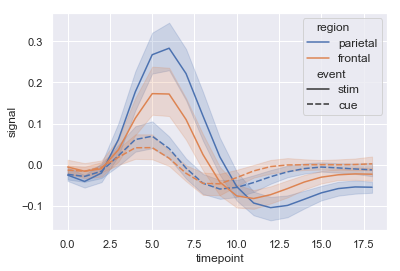

In [11]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
